# A Project for an Internship at "Oasis Infobyte"


#  Task 1:Iris Flower Classification

#  Dataset:"Iris.csv"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# loading dataset

In [3]:
iris_df=pd.read_csv(r"E:\nithya\IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print("species Counts")
iris_df["species"].value_counts()

species Counts


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
#correlation
corr_=iris_df.corr()
corr_

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

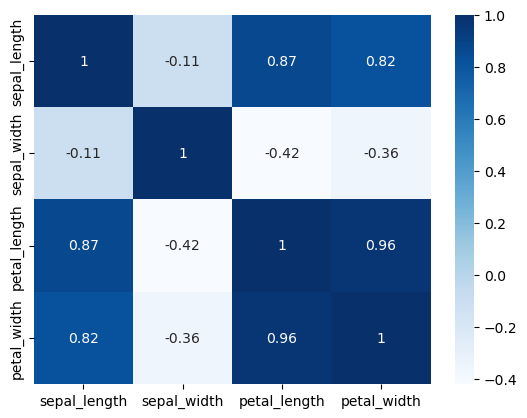

In [10]:
sns.heatmap(corr_, cmap="Blues", annot=True)

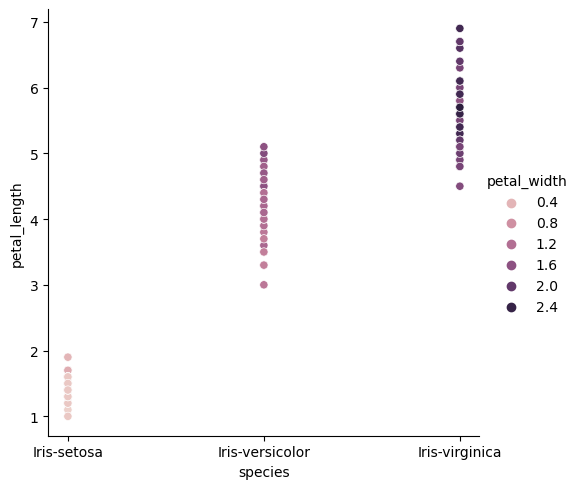

In [14]:
sns.relplot(x = iris_df["species"], y =iris_df["petal_length"],hue =iris_df["petal_width"], data = iris_df)
plt.show()

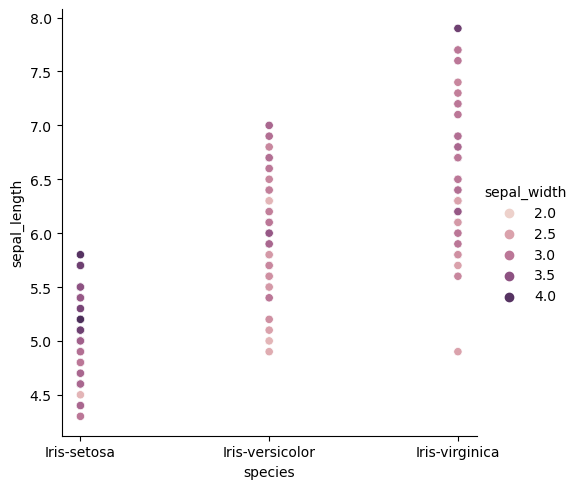

In [16]:
sns.relplot(x = iris_df["species"], y = iris_df["sepal_length"], hue = iris_df["sepal_width"], data = iris_df)
plt.show()

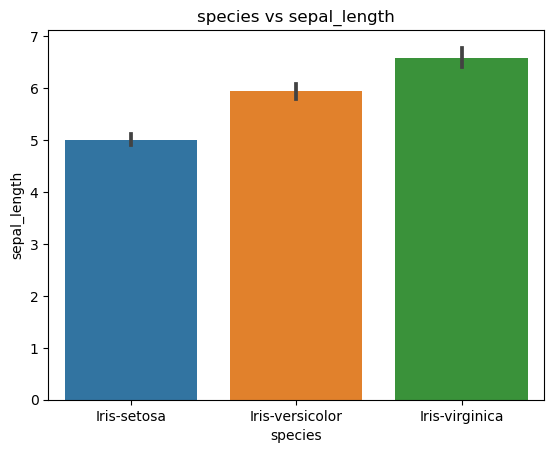

In [17]:
sns.barplot(x = iris_df["species"], y = iris_df["sepal_length"], data = iris_df)
plt.title("species vs sepal_length")
plt.show()

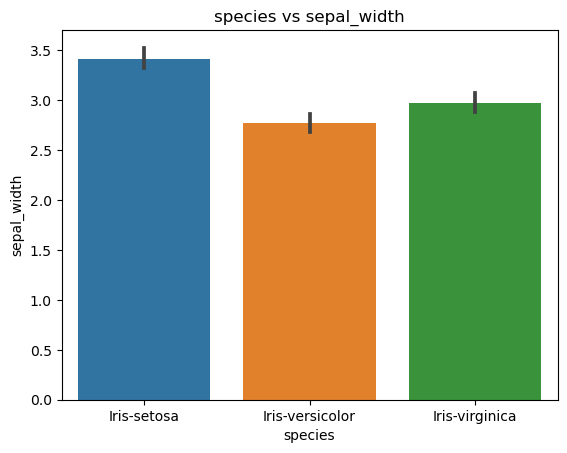

In [18]:
sns.barplot(x = iris_df["species"], y = iris_df["sepal_width"], data = iris_df)
plt.title("species vs sepal_width")
plt.show()

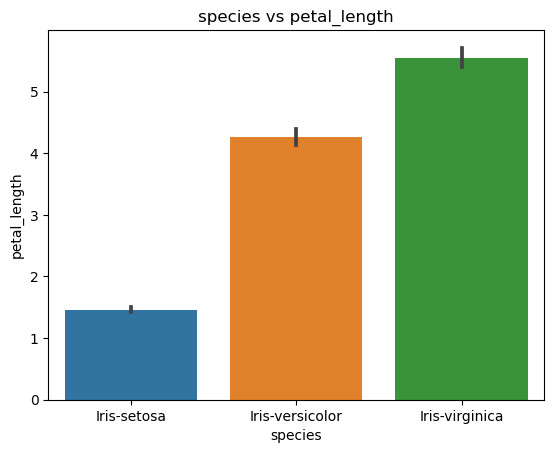

In [19]:
sns.barplot(x = iris_df["species"], y = iris_df["petal_length"], data = iris_df)
plt.title("species vs petal_length")
plt.show()

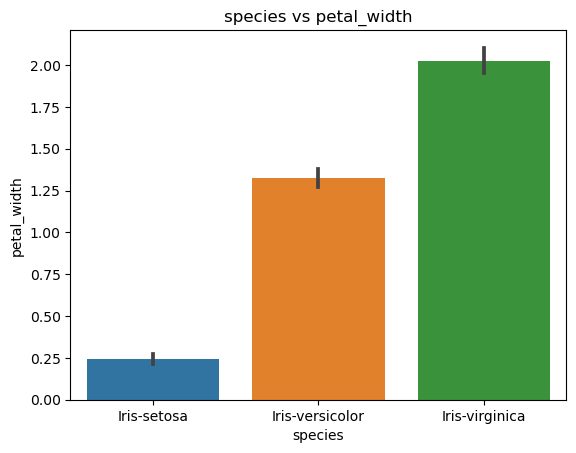

In [20]:
sns.barplot(x = iris_df["species"], y = iris_df["petal_width"], data = iris_df)
plt.title("species vs petal_width")
plt.show()

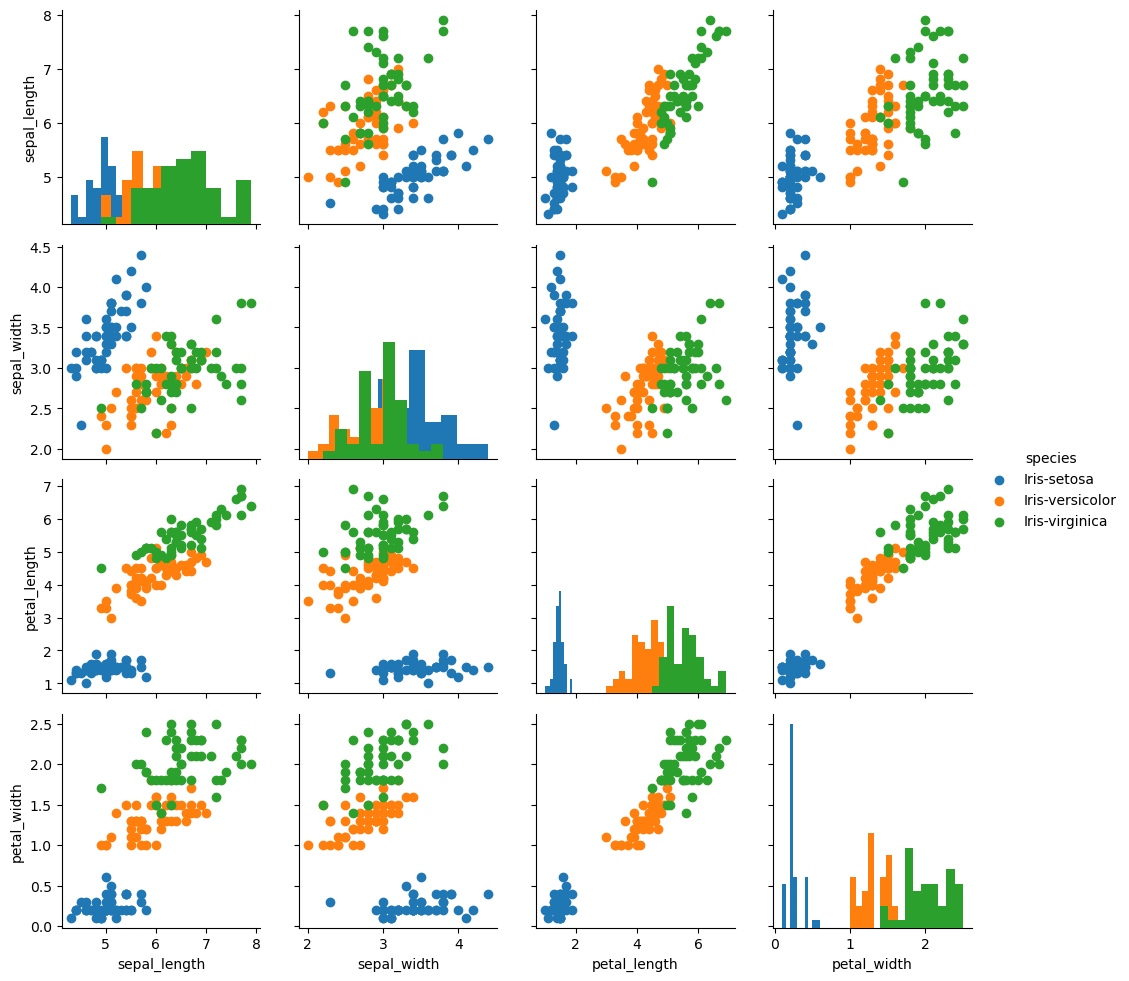

In [23]:
graph = sns.PairGrid(data=iris_df, hue = "species")
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

# splitting the dataset for training and testing

In [24]:
x = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris_df["species"]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
x_train

,sepal_length,sepal_width,petal_length,petal_width
75,6.6,3.0,4.4,1.4
66,5.6,3.0,4.5,1.5
61,5.9,3.0,4.2,1.5
125,7.2,3.2,6.0,1.8
144,6.7,3.3,5.7,2.5
...,...,...,...,...
142,5.8,2.7,5.1,1.9
67,5.8,2.7,4.1,1.0
96,5.7,2.9,4.2,1.3
60,5.0,2.0,3.5,1.0


In [27]:
y_train

75     Iris-versicolor
66     Iris-versicolor
61     Iris-versicolor
125     Iris-virginica
144     Iris-virginica
            ...       
142     Iris-virginica
67     Iris-versicolor
96     Iris-versicolor
60     Iris-versicolor
11         Iris-setosa
Name: species, Length: 120, dtype: object

In [28]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
109,7.2,3.6,6.1,2.5
26,5.0,3.4,1.6,0.4
77,6.7,3.0,5.0,1.7
135,7.7,3.0,6.1,2.3
114,5.8,2.8,5.1,2.4
40,5.0,3.5,1.3,0.3
56,6.3,3.3,4.7,1.6
76,6.8,2.8,4.8,1.4
132,6.4,2.8,5.6,2.2


In [29]:
y_test

72     Iris-versicolor
109     Iris-virginica
26         Iris-setosa
77     Iris-versicolor
135     Iris-virginica
114     Iris-virginica
40         Iris-setosa
56     Iris-versicolor
76     Iris-versicolor
132     Iris-virginica
127     Iris-virginica
138     Iris-virginica
69     Iris-versicolor
101     Iris-virginica
83     Iris-versicolor
7          Iris-setosa
37         Iris-setosa
49         Iris-setosa
143     Iris-virginica
111     Iris-virginica
46         Iris-setosa
10         Iris-setosa
126     Iris-virginica
100     Iris-virginica
15         Iris-setosa
53     Iris-versicolor
42         Iris-setosa
141     Iris-virginica
112     Iris-virginica
34         Iris-setosa
Name: species, dtype: object

# support vector classifier

In [30]:
from sklearn.svm import SVC
svc_model = SVC().fit(x_train, y_train)

In [32]:
predictions = svc_model.predict(x)
df = {"Actual":y,"Predicted":predictions}
pd.DataFrame(df)

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [33]:
y_hat = svc_model.predict(x_test)

In [35]:
#classification report using SVC model
print("\t\t CLASSIFICATION REPORT")
print("="*64)
print(classification_report(y_test, y_hat))
print("="*64)

		 CLASSIFICATION REPORT
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      0.71      0.71         7
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.87        30
      macro avg       0.85      0.85      0.85        30
   weighted avg       0.87      0.87      0.87        30



Confusion Matrix
 [[10  0  0]
 [ 0  5  2]
 [ 0  2 11]]


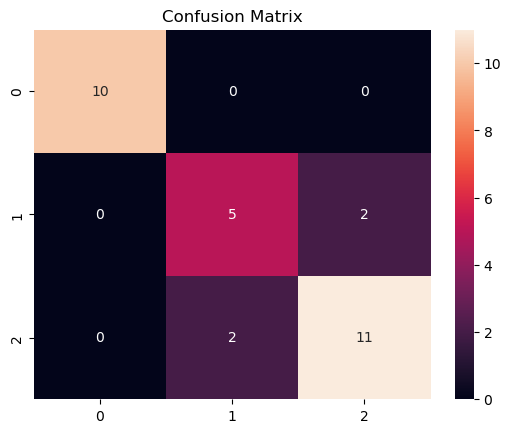

In [36]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [37]:
print("Accuracy Of the Support Vector Classifier Model\n",accuracy_score(y_test,y_hat)*100,'%')

Accuracy Of the Support Vector Classifier Model
 86.66666666666667 %


# Logistic Regression Model For Classification

In [39]:
lgmodel = LogisticRegression()
lgmodel.fit(x_train,y_train)

LogisticRegression()

In [40]:
pred = lgmodel.predict(x)
pd.DataFrame({"Actual":y, "Predictions":pred})

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [41]:
y_hat1 = lgmodel.predict(x_test)

In [42]:
print("\t\t Classification Report")
print("="*64)
print(classification_report(y_test, y_hat))
print("="*64)

		 Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      0.71      0.71         7
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.87        30
      macro avg       0.85      0.85      0.85        30
   weighted avg       0.87      0.87      0.87        30



Confusion Matrix
 [[10  0  0]
 [ 0  5  2]
 [ 0  2 11]]


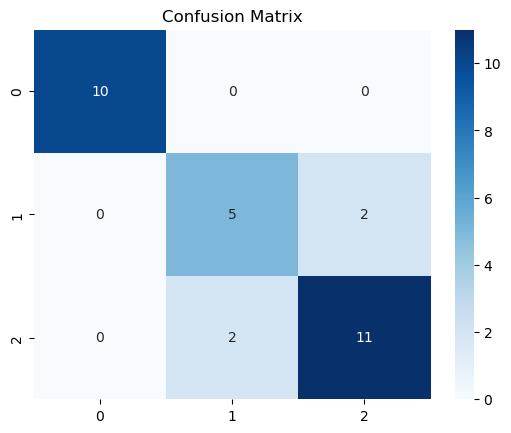

In [44]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm,cmap="Blues",annot=True)
plt.title("Confusion Matrix")
plt.show()

In [45]:
print("Accuracy Of the Logistic Regression Model:\n", accuracy_score(y_test,y_hat1)*100,"%")

Accuracy Of the Logistic Regression Model:
 93.33333333333333 %
